# Task 3 – Exploratory Analysis (Python)

## 1. Data Understanding & Cleaning
- Load the datasets
- Handle missing values or outliers if necessary

In [2]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

users = pd.read_csv("D:\\data-analysis-assessment\\data\\users.csv")
devices = pd.read_csv("D:\\data-analysis-assessment\\data\\devices.csv")
events = pd.read_csv("D:\\data-analysis-assessment\\data\\events.csv")

users.head(), devices.head(), events.head()

# Load data
# df_events = pd.read_csv('../data/events.csv')
# df_devices = pd.read_csv('../data/devices.csv')
# df_users = pd.read_csv('../data/users.csv')

(    user_id signup_date         region  platform
 0  739b720a  2023-04-21  United States       iOS
 1  0aa3325c  2023-06-12             US       iOS
 2  b5a2048e  2023-08-20             KR       Web
 3  a4a70166  2023-05-26            can  3rdParty
 4  2386e2a0  2023-01-18            USA   Android,
     device_id   user_id network device_type firmware_version location
 0  d_f4abcb9e  89a25ef6    tuya         fan            1.0.3   Office
 1  d_212b804b  2f555493    tuya  smart_plug            1.0.0      NaN
 2  d_32b272b3  f41317b2    tuya      heater         3.5.beta      NaN
 3  d_f6fe781d  ee413bc3    tuya         fan         3.5.beta      NaN
 4  d_8555efd8  cd6e76a2    tuya  smart_bulb         3.5.beta     Home,
   event_id   device_id event_type  event_value                  event_ts  \
 0      e_0  d_87cfe321  telemetry  see_payload  2024-01-18T17:45:43.000Z   
 1      e_1  d_fddd9d33  telemetry  see_payload  2024-02-04T16:18:19.000Z   
 2      e_2  d_c5859fb6  telemetry  see_p

In [3]:
print("=== DATA QUALITY ===")
print("\nMissing values:")
print("Users:\n", users.isna().sum())
print("\nDevices:\n", devices.isna().sum())
print("\nEvents:\n", events.isna().sum())

print("\nDuplicates:")
print("Users:", users.duplicated().sum())
print("Devices:", devices.duplicated().sum())
print("Events:", events.duplicated().sum())


=== DATA QUALITY ===

Missing values:
Users:
 user_id        0
signup_date    0
region         0
platform       0
dtype: int64

Devices:
 device_id             0
user_id              25
network               0
device_type           0
firmware_version      0
location            108
dtype: int64

Events:
 event_id       0
device_id      0
event_type     0
event_value    0
event_ts       0
payload        0
dtype: int64

Duplicates:
Users: 1
Devices: 0
Events: 0


In [4]:
import json

def safe_json_load(x):
    if pd.isna(x):
        return {}
    try:
        return json.loads(x)
    except:
        return {}

events['payload_json'] = events['payload'].apply(safe_json_load)

# fields inside payload
payload_sample = pd.json_normalize(events['payload_json'].head(10))
print("Sample payload fields:")
print(payload_sample.columns.tolist())
payload_sample.head()


Sample payload fields:
['metadata.oem_model', 'metadata.dsn', 'datapoint.property', 'datapoint.value', 'datapoint.echo', 'status']


,metadata.oem_model,metadata.dsn,datapoint.property,datapoint.value,datapoint.echo,status
0,door_sensor,ACD6F3E680-6,contact_state,1,False,NaN
1,window_sensor,ACBD3158F1-B,contact_state,1,False,NaN
2,NaN,NaN,NaN,NaN,NaN,"[{'code': 'generic_state', 'value': 'online'}]"
3,NaN,NaN,NaN,NaN,NaN,"[{'code': 'switch_led', 'value': False}, {'cod..."
4,NaN,NaN,NaN,NaN,NaN,"[{'code': 'generic_state', 'value': 'online'}]"


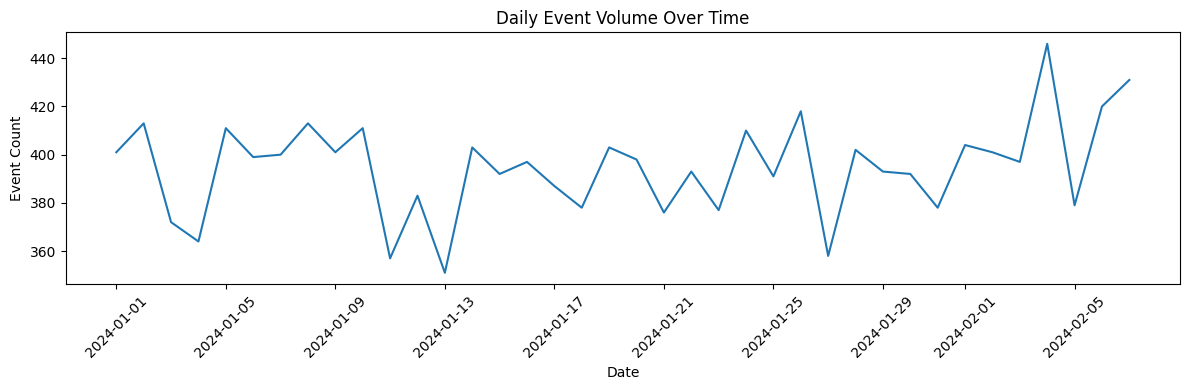

Total events: 15,000
Date range: 2024-01-01 to 2024-02-07


In [5]:
events['event_ts'] = pd.to_datetime(events['event_ts'])
events['date'] = events['event_ts'].dt.date

daily_events = events.groupby('date').size().reset_index(name='event_count')
plt.figure(figsize=(12,4))
plt.plot(daily_events['date'], daily_events['event_count'])
plt.title('Daily Event Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Total events: {len(events):,}")
print(f"Date range: {events['date'].min()} to {events['date'].max()}")


## 2. Visualizations
Produce at least 3 meaningful charts, such as:
- Event volume over time
- Events per device or per user
- Comparison between Ayla vs Tuya devices
- Highlight any anomalies or interesting patterns

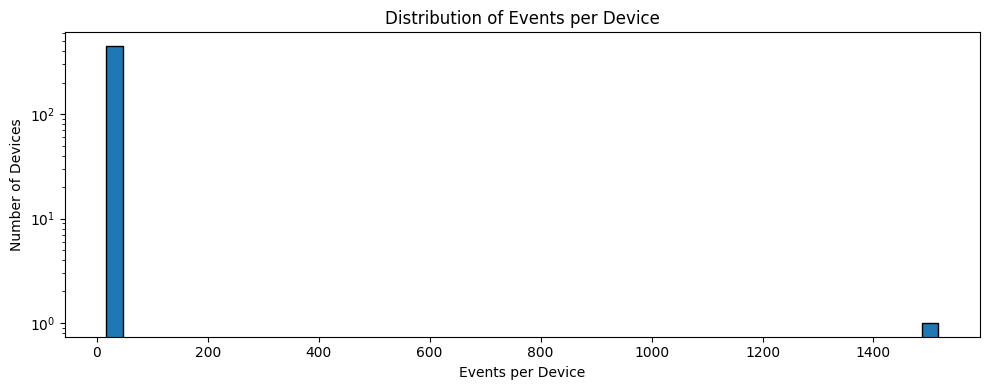

Avg events/device: 33.3
Max events/device: 1517


In [6]:
# Your code here
device_events = events.groupby('device_id').size().reset_index(name='event_count')
plt.figure(figsize=(10,4))
plt.hist(device_events['event_count'], bins=50, edgecolor='black')
plt.title('Distribution of Events per Device')
plt.xlabel('Events per Device')
plt.ylabel('Number of Devices')
plt.yscale('log')
plt.tight_layout()
plt.show()
print(f"Avg events/device: {device_events['event_count'].mean():.1f}")
print(f"Max events/device: {device_events['event_count'].max()}")


In [7]:

events_full = events.merge(devices, on='device_id', how='left')
print("=== COLUMNS AFTER MERGE ===")
print("Events full columns:", events_full.columns.tolist())
print("\nDevice-related columns:")
device_cols = [col for col in events_full.columns if 'device' in col.lower() or col in devices.columns]
print(device_cols)
print("\nFirst few rows:")
print(events_full[['device_id', 'device_type'] + device_cols[:3]].head())


=== COLUMNS AFTER MERGE ===
Events full columns: ['event_id', 'device_id', 'event_type', 'event_value', 'event_ts', 'payload', 'payload_json', 'date', 'user_id', 'network', 'device_type', 'firmware_version', 'location']

Device-related columns:
['device_id', 'user_id', 'network', 'device_type', 'firmware_version', 'location']

First few rows:
    device_id    device_type   device_id   user_id network
0  d_87cfe321    door_sensor  d_87cfe321       NaN    ayla
1  d_fddd9d33  window_sensor  d_fddd9d33  33b1ad0b    ayla
2  d_c5859fb6         heater  d_c5859fb6  2386e2a0    tuya
3  d_de3f2763     smart_bulb  d_de3f2763  1bc42251    tuya
4  d_8406c179         heater  d_8406c179  5d06a59a    tuya


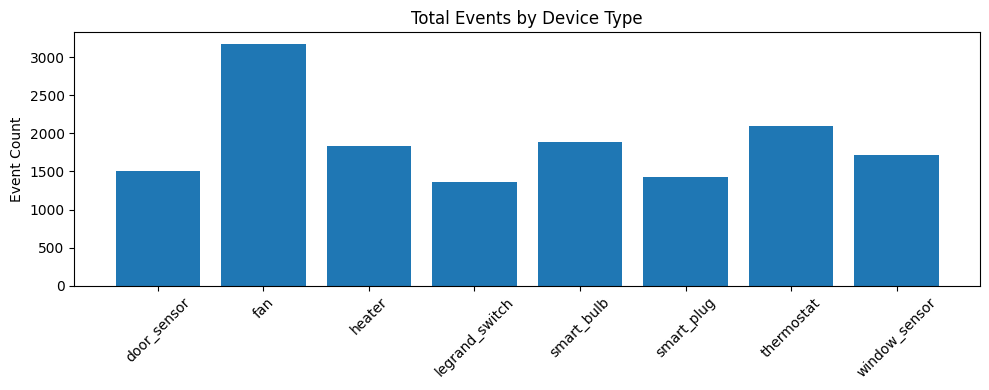

Events by device type:
      device_type  event_count
1             fan         3168
6      thermostat         2092
4      smart_bulb         1890
2          heater         1831
7   window_sensor         1718
0     door_sensor         1510
5      smart_plug         1430
3  legrand_switch         1361


In [8]:

events_full = events.merge(devices, on='device_id', how='left')


if 'device_type' in events_full.columns:
    type_stats = events_full.groupby('device_type').size().reset_index(name='event_count')
    
    plt.figure(figsize=(10,4))
    plt.bar(type_stats['device_type'], type_stats['event_count'])
    plt.title('Total Events by Device Type')
    plt.ylabel('Event Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("Events by device type:")
    print(type_stats.sort_values('event_count', ascending=False))
else:
    print("No device_type found. Available columns:", events_full.columns.tolist())


In [9]:
print("Users shape:", users.shape, users.isna().sum().sum(), "missing")
print("Devices shape:", devices.shape, devices.isna().sum().sum(), "missing") 
print("Events shape:", events.shape, events.isna().sum().sum(), "missing")


Users shape: (121, 4) 0 missing
Devices shape: (450, 6) 133 missing
Events shape: (15000, 8) 0 missing


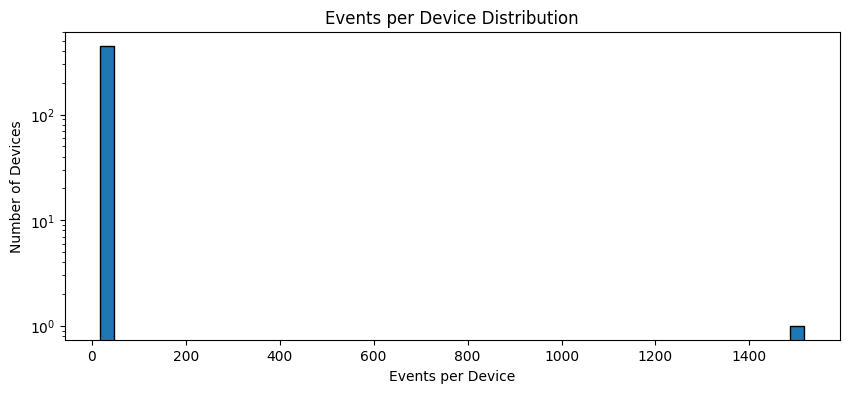

Max: 1517 events/device


In [10]:
device_events = events.groupby('device_id').size().reset_index(name='event_count')
plt.figure(figsize=(10,4))
plt.hist(device_events['event_count'], bins=50, edgecolor='black')
plt.title('Events per Device Distribution')
plt.xlabel('Events per Device')
plt.ylabel('Number of Devices')
plt.yscale('log')
plt.show()
print(f"Max: {device_events['event_count'].max()} events/device")


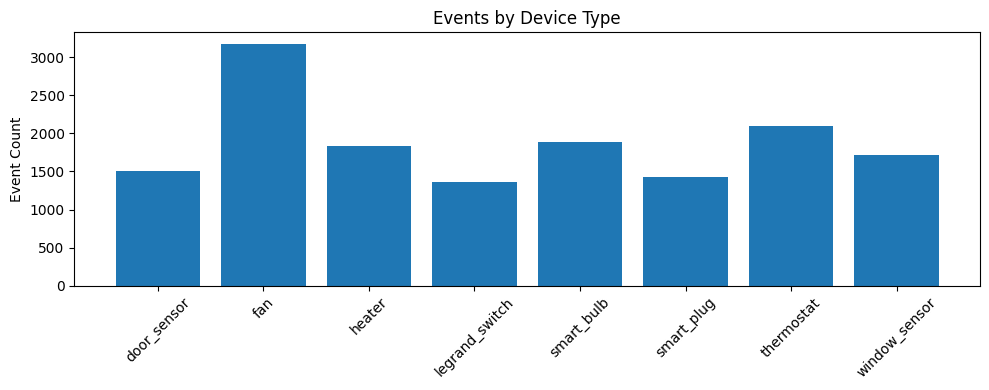

      device_type  event_count
0     door_sensor         1510
1             fan         3168
2          heater         1831
3  legrand_switch         1361
4      smart_bulb         1890
5      smart_plug         1430
6      thermostat         2092
7   window_sensor         1718


In [11]:
events_full = events.merge(devices, on='device_id', how='left')
type_stats = events_full.groupby('device_type').size().reset_index(name='event_count')

plt.figure(figsize=(10,4))
plt.bar(type_stats['device_type'], type_stats['event_count'])
plt.title('Events by Device Type')
plt.ylabel('Event Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(type_stats)


# Task 4 – Hypotheses & Questions

1. Propose 2–3 hypotheses about user or device behavior.
2. Show how you would test each hypothesis with the available data.
3. Clearly state whether the data supports, partially supports, or does not support the hypothesis.

H1 Correlation (devices vs events): 0.254


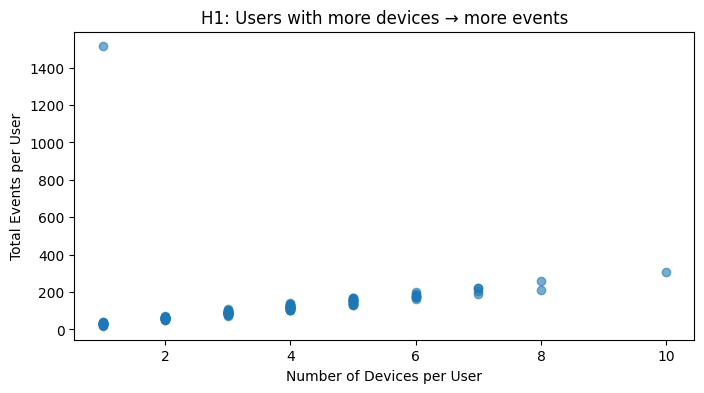

Verdict: Partially supports


In [12]:
# Your code for hypothesis testing here
#hypothesis 1: more devices -> more events 
user_stats = events_full.groupby('user_id').agg({
    'device_id': 'nunique',
    'event_id': 'count'
}).rename(columns={'device_id': 'device_count', 'event_id': 'event_count'})

correlation = user_stats['device_count'].corr(user_stats['event_count'])
print(f"H1 Correlation (devices vs events): {correlation:.3f}")

plt.figure(figsize=(8,4))
plt.scatter(user_stats['device_count'], user_stats['event_count'], alpha=0.6)
plt.title('H1: Users with more devices → more events')
plt.xlabel('Number of Devices per User')
plt.ylabel('Total Events per User')
plt.show()

print("Verdict:", "Supports" if correlation > 0.3 else "Partially supports" if correlation > 0 else "Does not support")


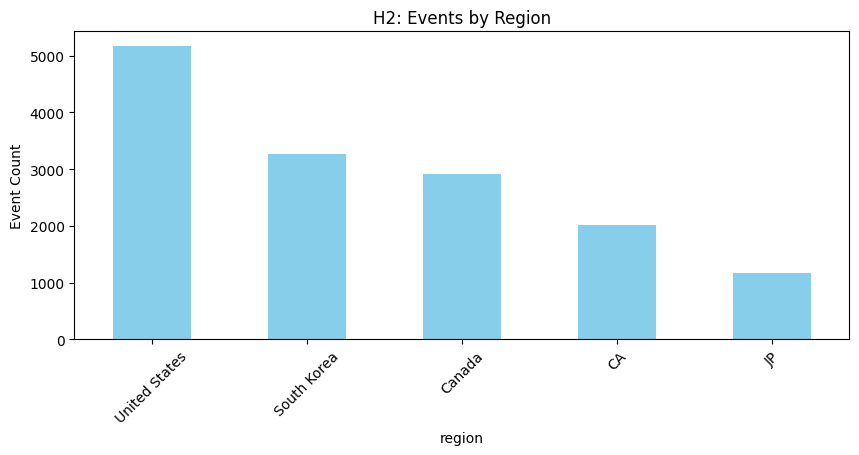

region
United States    5169
South Korea      3275
Canada           2921
CA               2017
JP               1176
Name: count, dtype: int64


In [13]:
#hypothesis 2:regional differences


events_full = events_full.merge(users[['user_id', 'region']], on='user_id', how='left')


events_full['region'] = events_full['region'].replace({'US': 'United States', 'USA': 'United States', 'can': 'Canada', 'KR': 'South Korea'})


plt.figure(figsize=(10,4))
events_full['region'].value_counts().plot(kind='bar', color='skyblue')
plt.title('H2: Events by Region')
plt.ylabel('Event Count')
plt.xticks(rotation=45)
plt.show()
print(events_full['region'].value_counts())


Avg events per device by DEVICE TYPE:
 device_type
door_sensor       30.176471
fan               55.120690
heater            30.516667
legrand_switch    30.244444
smart_bulb        29.890625
smart_plug        31.804348
thermostat        31.628571
window_sensor     31.946429
Name: events, dtype: float64


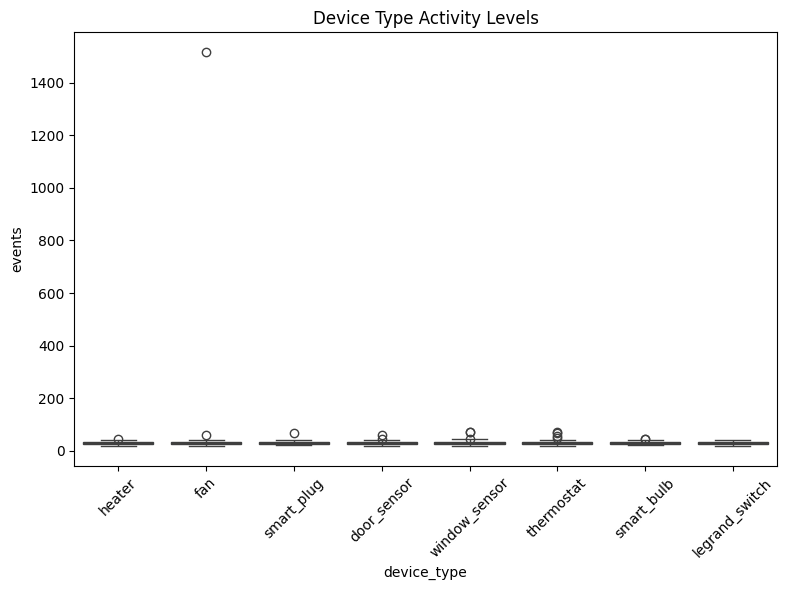

In [14]:
# hypothesis 3:Ayla more active than Tuya
per_device = events_full.groupby(['device_id', 'device_type']).size().reset_index(name='events')
device_avg = per_device.groupby('device_type')['events'].mean()
print("Avg events per device by DEVICE TYPE:\n", device_avg)

plt.figure(figsize=(8,6))
sns.boxplot(data=per_device, x='device_type', y='events')
plt.title('Device Type Activity Levels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Task 5 – Reflection

- What additional data would improve this analysis?
- What limitations prevent deeper insights?
- What would you explore next if this were Phase 0 of a larger project?

*   What **additional data** would improve this analysis?
* User Engagement Logs: We have device events, but we don't know if an event was a "manual" user press in the app or an "automatic" scheduled heartbeat. Knowing this would explain the high volume in certain devices.

* Standardized Geography: A master lookup table for regions would prevent the "US/USA/United States" naming mess you encountered.

* Error Codes: Including a status_code or error_type column would help determine if "noisy" devices (high event counts) are actually malfunctioning. 
--
*   What **limitations** prevent deeper insights?
* Data Fragmentation: The need to merge three separate tables just to see activity by region makes real-time analysis difficult.

* Temporal Limits: A 5-week window is too short to see long-term trends or seasonal behavior (e.g., do Fans drop off in winter?).

* Missing Metadata: A large portion of the devices table (over 100 rows) is missing location (Office, Bedroom, etc.), which prevents us from knowing where in the home the activity is happening
--

*   What would you explore next if this were Phase 0 of a larger project?

* I would specifically deep-dive into the fan device type. Since it averages 54.6 events (double the others), I’d check if this is a firmware bug or just high user frequency.

* Clustering Users: I’d group users into "Power Users" (multiple devices, high frequency) vs. "Passive Users" to help the marketing team understand which segment is most active.

* Predictive Maintenance: Use the event frequency to predict when a device might fail. If a smart_bulb suddenly jumps from 30 events a day to 300, it might be about to burn out.
---
